## This is an analysis of the Medical Cost dataset, by Prabhmeet Singh Deol.

### First we will import pandas, and use it to read the dataset. As well as do some method cleaning, and some data Wrangling. All of that has been Chained together, in the chunk , below for the purpose of ease to read , and debug.

In [26]:
import pandas as pd
from pandas_profiling import ProfileReport as pf
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
## Using a seperate file to import our functions.
from scripts import project_functions as fun
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
# This part processes the data without any method chaining.
dataSet= fun.load_and_process()
dataSet

BMI Smoker     Region  MedicalCosts_USD  Smoker_bin BMI_Category
0     27.90    yes  southwest         16884.924           1   Overweight
1     33.77     no  southeast          1725.552           0        Obese
2     33.00     no  southeast          4449.462           0        Obese
3     22.70     no  northwest         21984.471           0       Normal
4     28.88     no  northwest          3866.855           0   Overweight
...     ...    ...        ...               ...         ...          ...
1333  30.97     no  northwest         10600.548           0        Obese
1334  31.92     no  northeast          2205.981           0        Obese
1335  36.85     no  southeast          1629.834           0        Obese
1336  25.80     no  southwest          2007.945           0   Overweight
1337  29.07    yes  northwest         29141.360           1   Overweight

[1337 rows x 6 columns]

### Exploartory Research - Task 3

## This pandas Filter information, allows us to perform , and review several analytical tests , that might show some correlation. We can go through this , and see if our dataset , needs any more filtering.
	- Using this the categorize BMI was improved, as the previous version was leaving the dataset with several nan values.
	- Also some duplicate values were observed which were also removed(This change was made in the data processing file).
	- Also a decision was made to add a new column of BMI Category to help categorize the BMI's for easier understanding when producing plots.

Now we will explore the dataset Using plots.


In [28]:

pf(dataSet).to_notebook_iframe()

Render HTML: 100%|██████████| 1/1 [00:00<00:00,  1.30it/s]


## Pair plots, gives us several plots for all the different variables in out data Set. 

-This will allow us to look for relationships in different variables.

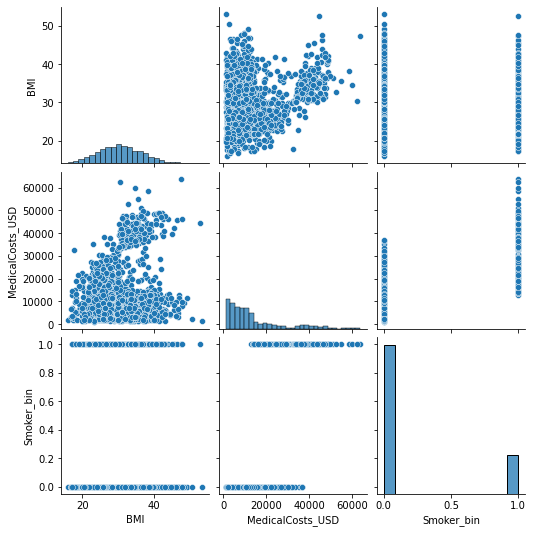

In [29]:
## Exploratory Research
plot1 = sns.pairplot(dataSet,palette="virdis")

The only thing that could be concluded from this is that , there seems to be some linear relationship between bmi , and the amount of Medical charges.

We will also get some summary statitistics for our dataset.

In [30]:
dataSet.describe().round(0).rename({'50%':'Median'}).T

count     mean      std     min     25%  Median      75%  \
BMI               1337.0     31.0      6.0    16.0    26.0    30.0     35.0   
MedicalCosts_USD  1337.0  13279.0  12110.0  1122.0  4746.0  9386.0  16658.0   
Smoker_bin        1337.0      0.0      0.0     0.0     0.0     0.0      0.0   

                      max  
BMI                  53.0  
MedicalCosts_USD  63770.0  
Smoker_bin            1.0

This will show us some more summary statitics based off different BMI groups.

In [31]:
dataSet.groupby('BMI_Category').agg(['mean','std','median','min','max']).round(1).drop(columns={'BMI'})

MedicalCosts_USD                                    Smoker_bin  \
                         mean      std   median     min      max       mean   
BMI_Category                                                                  
Normal                10434.5   7512.9   8604.2  1121.9  35069.4        0.2   
Obese                 15572.0  14553.2  10003.7  1131.5  63770.4        0.2   
Overweight            10987.5   8039.5   8659.4  1252.4  38245.6        0.2   
Underweight            8657.6   7591.7   6640.5  1621.3  32734.2        0.2   

                                  
              std median min max  
BMI_Category                      
Normal        0.4      0   0   1  
Obese         0.4      0   0   1  
Overweight    0.4      0   0   1  
Underweight   0.4      0   0   1

## Now we will explore some statitistical data about our data Set.

## We will Demonstrate the total number of 

The following code gives us some statistical data to explore the previous found co-relation even more. And the mean Medical charge in the Obese groups is found to be the highest.

Although the mean difference between Normal and Overweight (Medical Charges) does not seem to be much.

In [32]:
moneyStats=dataSet.groupby('BMI_Category')['MedicalCosts_USD'].agg(['mean','std','min', 'median','max']).round(1).T
moneyStats

BMI_Category   Normal    Obese  Overweight  Underweight
mean          10434.5  15572.0     10987.5       8657.6
std            7512.9  14553.2      8039.5       7591.7
min            1121.9   1131.5      1252.4       1621.3
median         8604.2  10003.7      8659.4       6640.5
max           35069.4  63770.4     38245.6      32734.2

After reviewing the results from the i-notebook , the data was cleaned accordingly. Duplicate values, and functions were fixed to a more higher decimal values , to give more accurate results.

The following code, may not be much useful but I was curious to see the percentage of US Population that is under the Obese Category.
	 - The plots produced below show us that a good chunk of the US population can be categorized as Obese, and that particular group has the highest mean Medical charges.

/Users/deol/opt/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 0, 'BMI'),
 Text(0.5, 1.0, 'Density of BMI of various American Citizens.')]

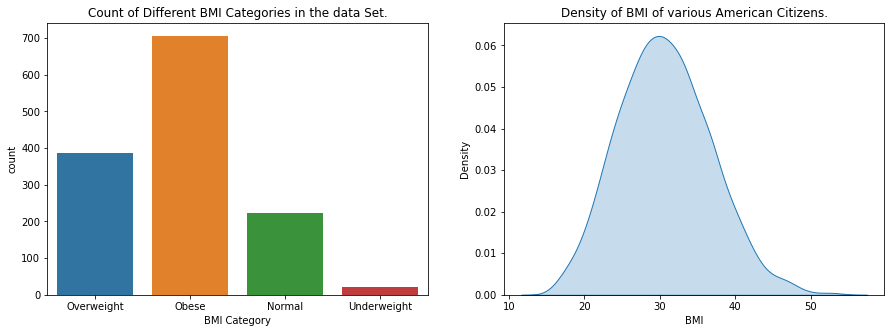

In [33]:
fig, ax =plt.subplots(1,2,figsize=(15,5))
sns.countplot(dataSet['BMI_Category'],ax=ax[0]).set(
	xlabel = "BMI Category",
	title="Count of Different BMI Categories in the data Set.",
	
)
sns.kdeplot(
   data=dataSet, x="BMI",fill=True,ax=ax[1]
).set(
	xlabel = "BMI",
	title="Density of BMI of various American Citizens.",
)

The following code will help us explore the relationship between BMI Category, and Medical Charges.

<ipython-input-42-8aadb14edd2d>:58: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


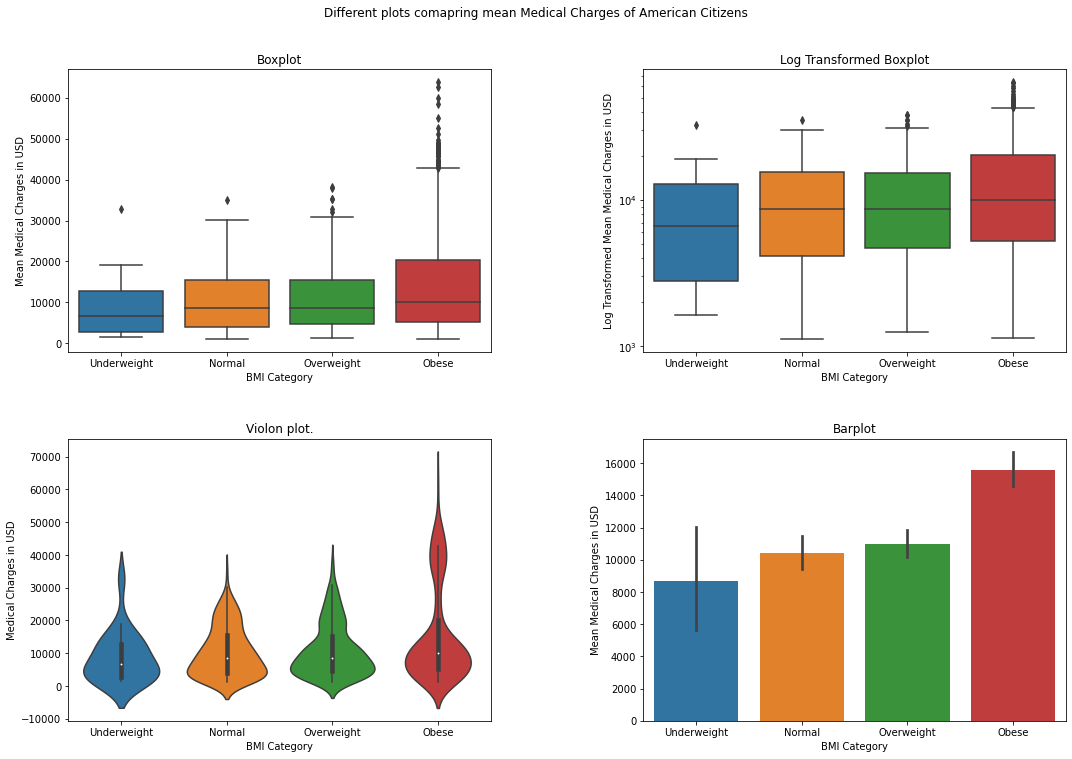

In [42]:
fig, ax =plt.subplots(2,2,figsize=(15,10))

boxplot = sns.boxplot(
	data = dataSet,
	x="BMI_Category",
	y="MedicalCosts_USD",
	order=['Underweight','Normal','Overweight','Obese'],
	ax=ax[0][0]

)
boxplot.set(
	#yscale="log",
	xlabel="BMI Category",
	ylabel="Mean Medical Charges in USD",
	title="Boxplot",
)
logboxplot = sns.boxplot(
	data = dataSet,
	x="BMI_Category",
	y="MedicalCosts_USD",
	order=['Underweight','Normal','Overweight','Obese'],
	ax=ax[0][1],

)
logboxplot.set(
	yscale="log",
	xlabel="BMI Category",
	ylabel="Log Transformed Mean Medical Charges in USD",
	title="Log Transformed Boxplot",
)
barplot = sns.barplot(
	data = dataSet,
	x="BMI_Category",
	y="MedicalCosts_USD",
	order=['Underweight','Normal','Overweight','Obese'],
	ax=ax[1][1],
)
barplot.set(
	xlabel="BMI Category",
	ylabel="Mean Medical Charges in USD",
	title="Barplot",
)
sns.violinplot(
	data = dataSet,
	x="BMI_Category",
	y="MedicalCosts_USD",
	order=['Underweight','Normal','Overweight','Obese'],
	ax=ax[1][0],

).set(
	#yscale="log",
	xlabel="BMI Category",
	ylabel="Medical Charges in USD",
	title="Violon plot.",
)
fig.tight_layout(h_pad=4,w_pad=10)
plt.suptitle("Different plots comapring mean Medical Charges of American Citizens",y=1.05)
fig.show()



Since we can also plot numerical data with numerical data (BMI vs Medical charges),

<ipython-input-36-19510db2f0ad>:28: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


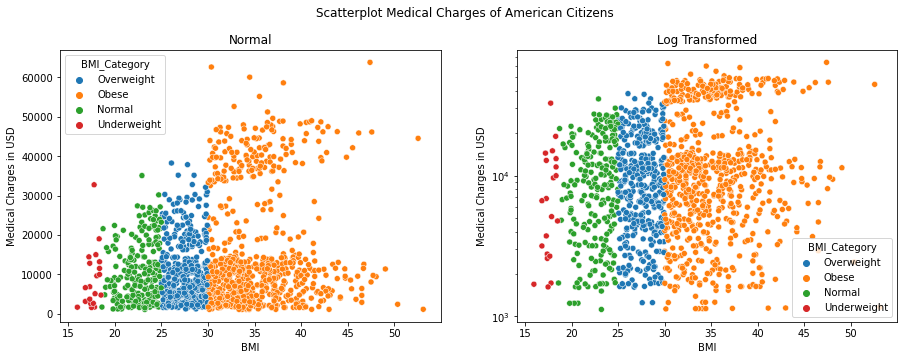

In [36]:
fig, ax =plt.subplots(1,2,figsize=(15,5))
scatter1=sns.scatterplot(
	data=dataSet,
	x="BMI",
	y="MedicalCosts_USD",
	hue="BMI_Category",
	ax=ax[0],
	)
scatter1.set(
	xlabel="BMI",
	ylabel="Medical Charges in USD",
	title="Normal",
)
scatter1=sns.scatterplot(
	data=dataSet,
	x="BMI",
	y="MedicalCosts_USD",
	hue="BMI_Category",
	ax=ax[1]
	)
scatter1.set(
	yscale="log",
	xlabel="BMI",
	ylabel="Medical Charges in USD",
	title="Log Transformed",
)
plt.suptitle("Scatterplot Medical Charges of American Citizens",y=1)
fig.show()

[None,
 Text(0.5, 0, 'BMI '),
 Text(0, 0.5, 'Medical Charges in USD'),
 Text(0.5, 1.0, 'BMI vs Medical Charges of U.S. Citizens')]

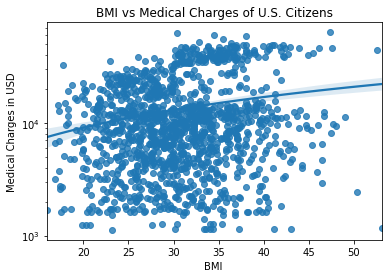

In [37]:
regplot = sns.regplot(
	data = dataSet,
	x="BMI",
	y="MedicalCosts_USD",
)
regplot.set(
	yscale="log",
	xlabel="BMI ",
	ylabel="Medical Charges in USD",
	title="BMI vs Medical Charges of U.S. Citizens",
)

## EDA Concolusion 
- It does look like the obese category of , does on average have higher medical expenses. Although it was also found that, 50 percentile of Americans are actually Obese. Therefore this observation will be irrelevant , unless we are able to sample equal number of observations, and explore their mean medical Spending. 

## Research Question

- Does having a bmi greater than 25 result, in higher medical expenses in America .

From All the above graphs we might , assume that the obese groups have higher medical bills than other groups. Although this might be biased since we have a higher count of Obese people in our population. Therefore we will now try to sample equal observations , from each of out categories.

In [38]:
randomSample = dataSet.groupby('BMI_Category').sample(n=20)
randomSample

BMI Smoker     Region  MedicalCosts_USD  Smoker_bin BMI_Category
1285  24.32     no  northeast          8534.672           0       Normal
966   24.80    yes  northwest         23967.383           1       Normal
1129  18.60     no  southwest          1728.897           0       Normal
496   23.60     no  southwest          4931.647           0       Normal
716   22.61     no  northwest          9566.991           0       Normal
...     ...    ...        ...               ...         ...          ...
821   17.67     no  northwest          2680.949           0  Underweight
1074  18.34     no  northeast         13204.286           0  Underweight
410   17.48     no  northwest          1621.340           0  Underweight
428   16.82     no  northeast          3167.456           0  Underweight
250   17.29    yes  northeast         12829.455           1  Underweight

[80 rows x 6 columns]

Now we will try to get new Summary statitics on randomly sampled data.

In [39]:
randomSample.groupby('BMI_Category')['MedicalCosts_USD'].agg(['mean','std','min', 'median','max']).round(1).T


BMI_Category   Normal    Obese  Overweight  Underweight
mean          10199.6  11510.9     13153.5       8961.2
std            8768.1  12550.4      7725.9       7657.0
min            1625.4   1261.9      2045.7       1621.3
median         8569.2   7146.4     13065.4       6759.3
max           30166.6  48517.6     26140.4      32734.2

Now we will explore new sumart statistics of the newly sampled dataset.

In [40]:
randomSample.groupby('BMI_Category').agg(['mean','std','median','min','max']).round(1).drop(columns={'BMI'})

MedicalCosts_USD                                    Smoker_bin  \
                         mean      std   median     min      max       mean   
BMI_Category                                                                  
Normal                10199.6   8768.1   8569.2  1625.4  30166.6        0.2   
Obese                 11510.9  12550.4   7146.4  1261.9  48517.6        0.1   
Overweight            13153.5   7725.9  13065.4  2045.7  26140.4        0.3   
Underweight            8961.2   7657.0   6759.3  1621.3  32734.2        0.2   

                                  
              std median min max  
BMI_Category                      
Normal        0.4      0   0   1  
Obese         0.3      0   0   1  
Overweight    0.5      0   0   1  
Underweight   0.4      0   0   1

## The following plots show that The Obese group still has the highest median Medcial Charges , although we do not see a linear trend from underweight to obese. i.e The Overweight did not show evidence of having a higher mean that Normal people, even though Obese people did.

<ipython-input-50-e2102347a542>:55: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


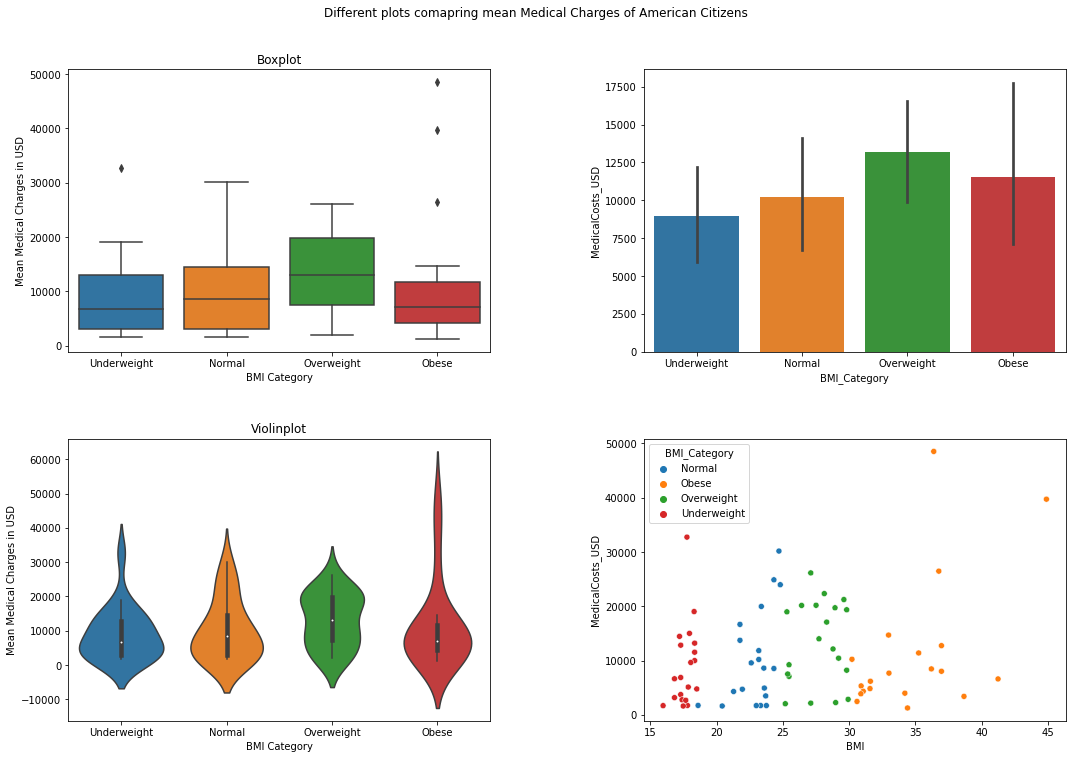

In [50]:
fig, ax =plt.subplots(2,2,figsize=(15,10))

boxplot = sns.boxplot(
	data = randomSample,
	x="BMI_Category",
	y="MedicalCosts_USD",
	order=['Underweight','Normal','Overweight','Obese'],
	ax=ax[0][0]

)
boxplot.set(
	#yscale="log",
	xlabel="BMI Category",
	ylabel="Mean Medical Charges in USD",
	title="Boxplot",
)
sns.barplot(
	data = randomSample,
	x="BMI_Category",
	y="MedicalCosts_USD",
	order=['Underweight','Normal','Overweight','Obese'],
	ax=ax[0][1],
)
barplot.set(
	xlabel="BMI Category",
	ylabel="Mean Medical Charges in USD",
	title="Barplot",
)
sns.violinplot(
	data = randomSample,
	x="BMI_Category",
	y="MedicalCosts_USD",
	order=['Underweight','Normal','Overweight','Obese'],
	ax=ax[1][0],
).set(
	xlabel="BMI Category",
	ylabel="Mean Medical Charges in USD",
	title="Violinplot",
)
sns.scatterplot(
	data=randomSample,
	x="BMI",
	y="MedicalCosts_USD",
	hue="BMI_Category",
	ax=ax[1][1]
	)
scatter1.set(
	yscale="log",
	xlabel="BMI",
	ylabel="Medical Charges in USD",
	title="Log Transformed",
)
fig.tight_layout(h_pad=4,w_pad=10)
plt.suptitle("Different plots comapring mean Medical Charges from a random sample of  American Citizens",y=1.05)
fig.show()


Also the scatter plot before fail to show any linear co-relation between bmi and Medical Charges.

## Research Conclusion.
- As per the data explore , having a BMI over 25 in America did not seem to be related with higher medical Expenses.
- Although it was found that more than 50% of Americans can be categorized as Obsese as per [CDC guidelines](https://www.cdc.gov/healthyweight/assessing/index.html). Although being Obese did seem to be related to higher Medical charges, a linear relationship between BMI and higher medical expenses was not observed.
- I was not able to confirm that i was able to sample the random sample correctly, as in i performed the right statistical technique to obtain the sample. Thus no conclusion about the random Sample were made. Although I did present a Tableau dashboard of the dataSet in my own Analysis Folder.